## EDA of cadiovascular diseases data

This work is my first public Kernel in Kaggle, and I would really appreciate your feedback or upvote!

The dataset consists of 70 000 records of patients data in 12 features, such as age, gender, systolic blood pressure, diastolic blood pressure, and etc. The target class "cardio" equals to 1, when patient has cardiovascular desease, and it's 0, if patient is healthy.

The task is to predict the presence or absence of cardiovascular disease (CVD) using the patient examination results.

#### Data description

There are 3 types of input features:

- *Objective*: factual information;
- *Examination*: results of medical examination;
- *Subjective*: information given by the patient.

| Feature | Variable Type | Variable      | Value Type |
|---------|--------------|---------------|------------|
| Age | Objective Feature | age | int (days) |
| Height | Objective Feature | height | int (cm) |
| Weight | Objective Feature | weight | float (kg) |
| Gender | Objective Feature | gender | categorical code |
| Systolic blood pressure | Examination Feature | ap_hi | int |
| Diastolic blood pressure | Examination Feature | ap_lo | int |
| Cholesterol | Examination Feature | cholesterol | 1: normal, 2: above normal, 3: well above normal |
| Glucose | Examination Feature | gluc | 1: normal, 2: above normal, 3: well above normal |
| Smoking | Subjective Feature | smoke | binary |
| Alcohol intake | Subjective Feature | alco | binary |
| Physical activity | Subjective Feature | active | binary |
| Presence or absence of cardiovascular disease | Target Variable | cardio | binary |

All of the dataset values were collected at the moment of medical examination.


### Initial analysis
Let's look at the dataset and given variables.

In [40]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
from matplotlib import pyplot as plt
import os
df = pd.read_csv("cardio_train.csv",sep=";")

In [41]:
df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


#### Univariate analysis
To understand all our variables, at first, we should look at their datatypes. We can do it with `info()` function:

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           70000 non-null  int64  
 1   age          70000 non-null  int64  
 2   gender       70000 non-null  int64  
 3   height       70000 non-null  int64  
 4   weight       70000 non-null  float64
 5   ap_hi        70000 non-null  int64  
 6   ap_lo        70000 non-null  int64  
 7   cholesterol  70000 non-null  int64  
 8   gluc         70000 non-null  int64  
 9   smoke        70000 non-null  int64  
 10  alco         70000 non-null  int64  
 11  active       70000 non-null  int64  
 12  cardio       70000 non-null  int64  
dtypes: float64(1), int64(12)
memory usage: 6.9 MB


All features are numerical, 12 integers and 1 decimal number (weight). The second column gives us an idea how big is the dataset and how many non-null values are there for each field. We can use `describe()` to display sample statistics such as `min`, `max`, `mean`,`std` for each attribute:

In [43]:
df.describe()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,49972.419900,19468.865814,1.349571,164.359229,74.205690,128.817286,96.630414,1.366871,1.226457,0.088129,0.053771,0.803729,0.499700
std,28851.302323,2467.251667,0.476838,8.210126,14.395757,154.011419,188.472530,0.680250,0.572270,0.283484,0.225568,0.397179,0.500003
min,0.000000,10798.000000,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,25006.750000,17664.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,50001.500000,19703.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,74889.250000,21327.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,99999.000000,23713.000000,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


Age is measured in days, height is in centimeters. Let's look ate the numerical variables and how are they spread among target class. For example, at what age does the number of people with CVD exceed the number of people without CVD?

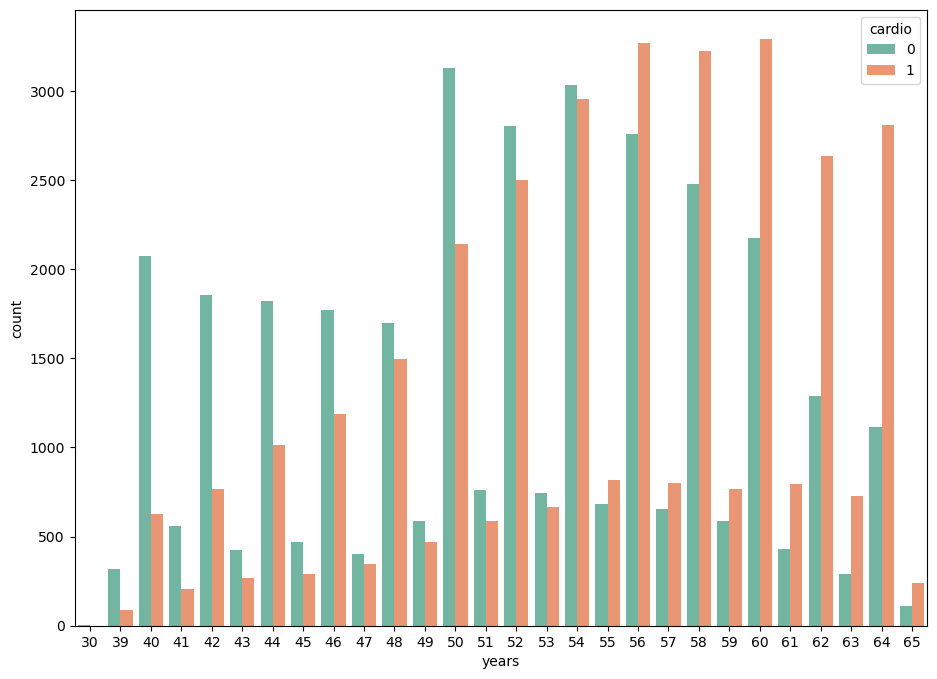

In [44]:
from matplotlib import rcParams
rcParams['figure.figsize'] = 11, 8
df['years'] = (df['age'] / 365).round().astype('int')
sns.countplot(x='years', hue='cardio', data = df, palette="Set2");

It can be observed that people over 55 of age are more exposed to CVD. From the table above, we can see that there are outliers in `ap_hi`, `ap_lo`, `weight` and `height`. We will deal with them later.

Let's look at categorical variables in the dataset and their distribution:

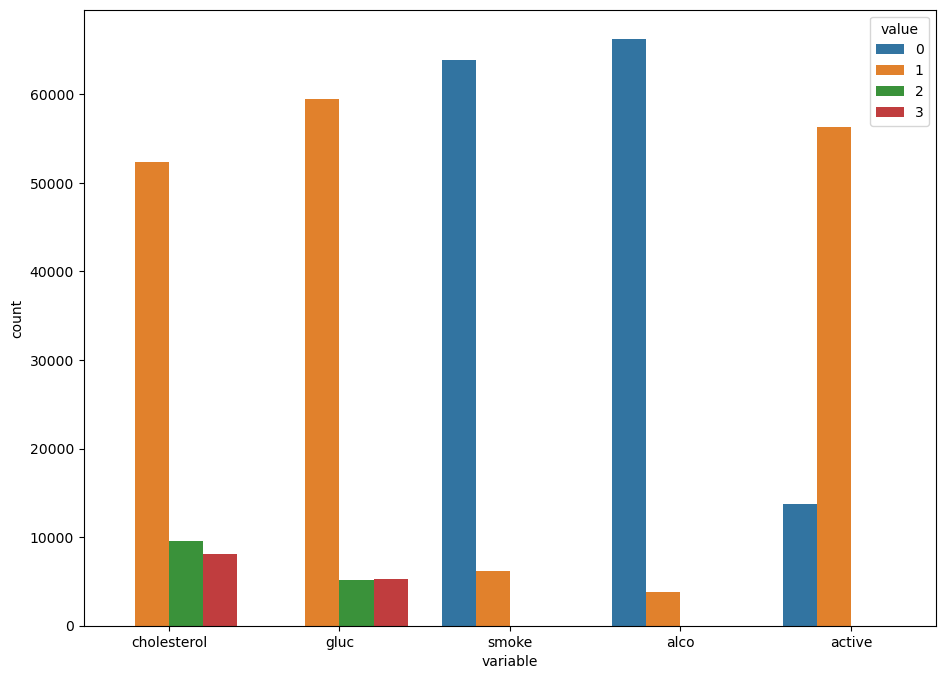

In [45]:
df_categorical = df.loc[:,['cholesterol','gluc', 'smoke', 'alco', 'active']]
sns.countplot(x="variable", hue="value",data= pd.melt(df_categorical));

#### Bivariate analysis

It may be useful to split categorical variables by target class:

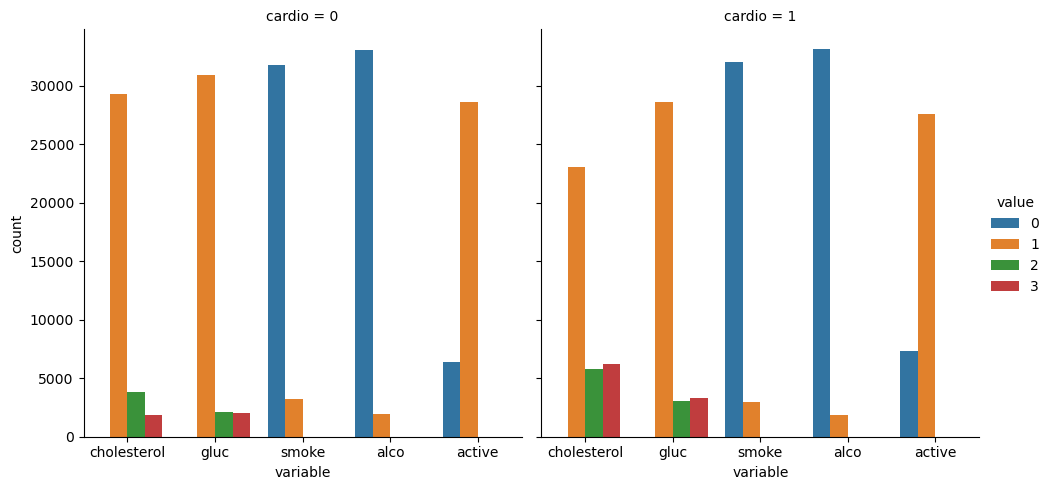

In [46]:
df_long = pd.melt(df, id_vars=['cardio'], value_vars=['cholesterol','gluc', 'smoke', 'alco', 'active'])
sns.catplot(x="variable", hue="value", col="cardio",
                data=df_long, kind="count");

It can be clearly seen that patients with CVD have higher cholesterol and blood glucose level. And, generally speaking less active.

To figure out whether "1" stands for women or men in gender column, let's calculate the mean of height per gender. We assume that men are higher than women on average.

In [47]:
df.groupby('gender')['height'].mean()

gender
1    161.355612
2    169.947895
Name: height, dtype: float64

Average height for "2" gender is greater, than for "1" gender, therefore "1" stands for women. Let's see how many men and women presented in the dataset:

In [48]:
df['gender'].value_counts()

1    45530
2    24470
Name: gender, dtype: int64

Who more often report consuming alcohol - men or women?

In [49]:
df.groupby('gender')['alco'].sum()

gender
1    1161
2    2603
Name: alco, dtype: int64

So, men consume alcohol more frequently on average.
Next, the target variables are balanced:`

In [50]:
df['cardio'].value_counts(normalize=True)

0    0.5003
1    0.4997
Name: cardio, dtype: float64

To see how the target class is distributed among men and women, we can use also `crosstab`

In [51]:
pd.crosstab(df['cardio'],df['gender'],normalize=True)

gender,1,2
cardio,,
0,0.327343,0.172957
1,0.323086,0.176614


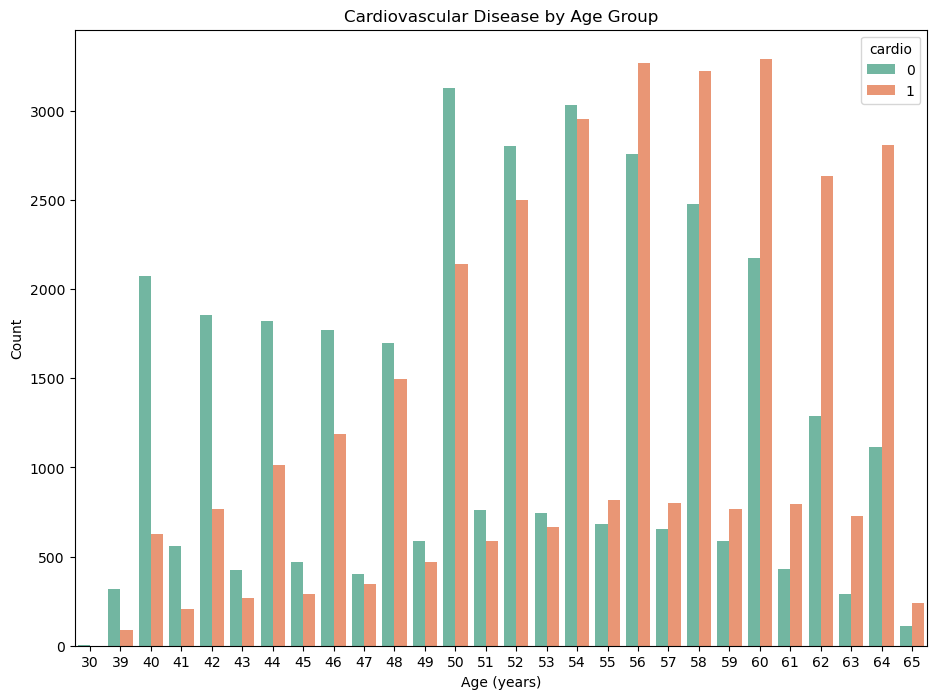

In [52]:
# prompt: suggest chart for the code above

sns.countplot(x='years', hue='cardio', data=df, palette="Set2")
plt.title('Cardiovascular Disease by Age Group')
plt.xlabel('Age (years)')
plt.ylabel('Count')
plt.show()


### Cleaning Data

Are there any `NA`s or missing values in a dataset?

In [53]:
df.isnull().values.any()

False

If we look more closely to height and weight columns, we will notice that minimum height is 55 cm and minimum weight is 10 kg. That has to be an error, since minimum age is 10798 days, which equals to 29 years. On the other hand, the maximum height is 250 cm and the highest weight is 200 kg, which might be irrelevant, when generilizing data. To deal with these errors, we can remove outliers.

In [54]:
df.describe()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,years
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,49972.419900,19468.865814,1.349571,164.359229,74.205690,128.817286,96.630414,1.366871,1.226457,0.088129,0.053771,0.803729,0.499700,53.338686
std,28851.302323,2467.251667,0.476838,8.210126,14.395757,154.011419,188.472530,0.680250,0.572270,0.283484,0.225568,0.397179,0.500003,6.765294
min,0.000000,10798.000000,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,30.000000
25%,25006.750000,17664.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,48.000000
50%,50001.500000,19703.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,54.000000
75%,74889.250000,21327.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000,58.000000
max,99999.000000,23713.000000,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000,65.000000


Let's remove weights and heights, that fall below 2.5% or above 97.5% of a given range.

In [55]:
df.drop(df[(df['height'] > df['height'].quantile(0.975)) | (df['height'] < df['height'].quantile(0.025))].index,inplace=True)
df.drop(df[(df['weight'] > df['weight'].quantile(0.975)) | (df['weight'] < df['weight'].quantile(0.025))].index,inplace=True)

In addition, in some cases diastolic pressure is higher than systolic, which is also  incorrect. How many records are inaccurate in terms of blood pressure?

In [56]:
print("Diastilic pressure is higher than systolic one in {0} cases".format(df[df['ap_lo']> df['ap_hi']].shape[0]))

Diastilic pressure is higher than systolic one in 1082 cases


Let's get rid of the outliers, moreover blood pressure could not be negative value!

In [57]:
df.drop(df[(df['ap_hi'] > df['ap_hi'].quantile(0.975)) | (df['ap_hi'] < df['ap_hi'].quantile(0.025))].index,inplace=True)
df.drop(df[(df['ap_lo'] > df['ap_lo'].quantile(0.975)) | (df['ap_lo'] < df['ap_lo'].quantile(0.025))].index,inplace=True)

Diastilic pressure is higher than systolic one in 0 cases


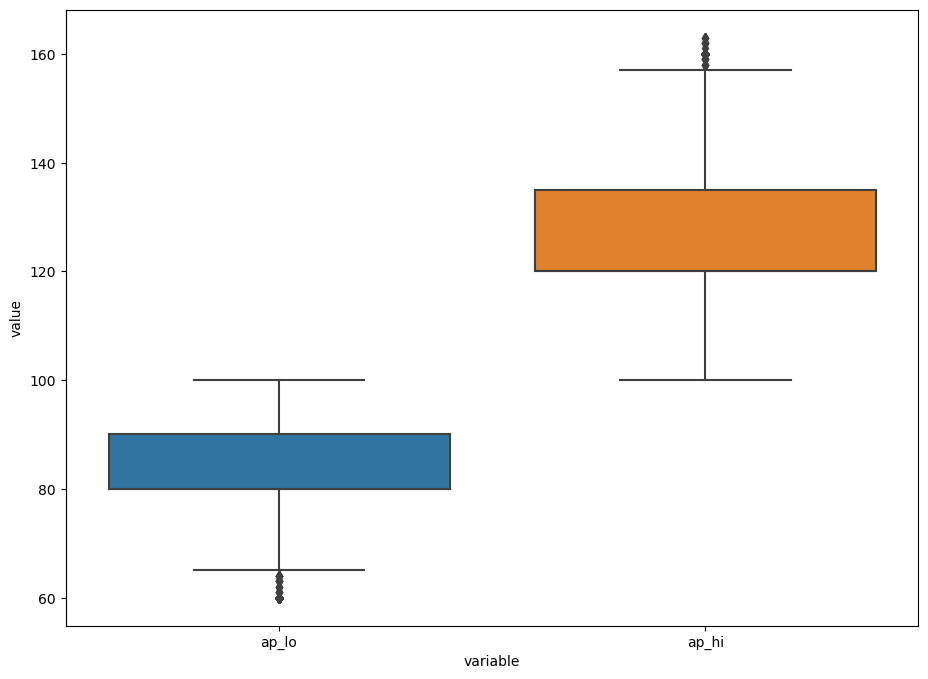

In [58]:
blood_pressure = df.loc[:,['ap_lo','ap_hi']]
sns.boxplot(x = 'variable',y = 'value',data = blood_pressure.melt())
print("Diastilic pressure is higher than systolic one in {0} cases".format(df[df['ap_lo']> df['ap_hi']].shape[0]))

#### Multivariate analysis
It might be useful to consider correation matrix:

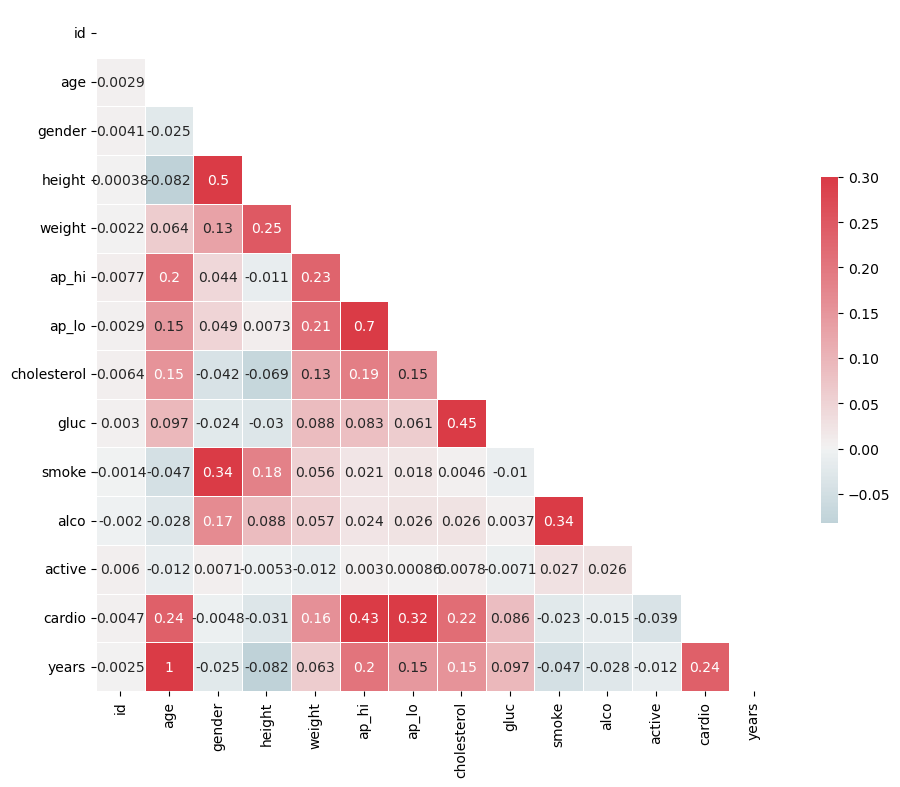

In [59]:
corr = df.corr()
cmap = sns.diverging_palette(220, 10, as_cmap=True)
# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))
# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,annot = True,
            square=True, linewidths=.5, cbar_kws={"shrink": .5});

As we can see age and cholesterol have significant impact, but not very high correlated with target class.

Let's create `violinplot` to show height distribution across gender. Looking at the mean values of height and weight for each value of the gender feature might not be enough to determin whether 1 is male or female designation.

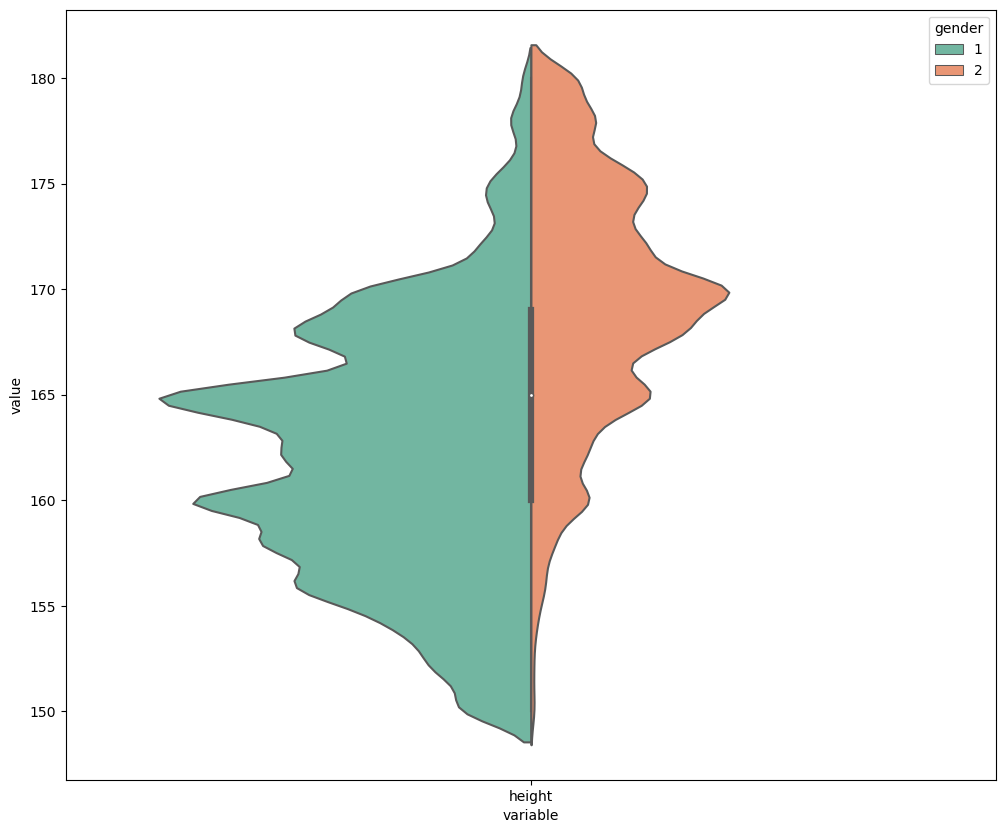

In [60]:
import warnings
warnings.filterwarnings("ignore")
df_melt = pd.melt(frame=df, value_vars=['height'], id_vars=['gender'])
plt.figure(figsize=(12, 10))
ax = sns.violinplot(
    x='variable',
    y='value',
    hue='gender',
    split=True,
    data=df_melt,
    scale='count',
    scale_hue=False,
    palette="Set2");

Let's create a new feature - Body Mass Index (BMI):

$$BMI = \frac {mass_{kg}} {height ^2_{m}},$$

and compare average BMI for healthy people to average BMI of ill people. Normal BMI values are said to be from 18.5 to 25.

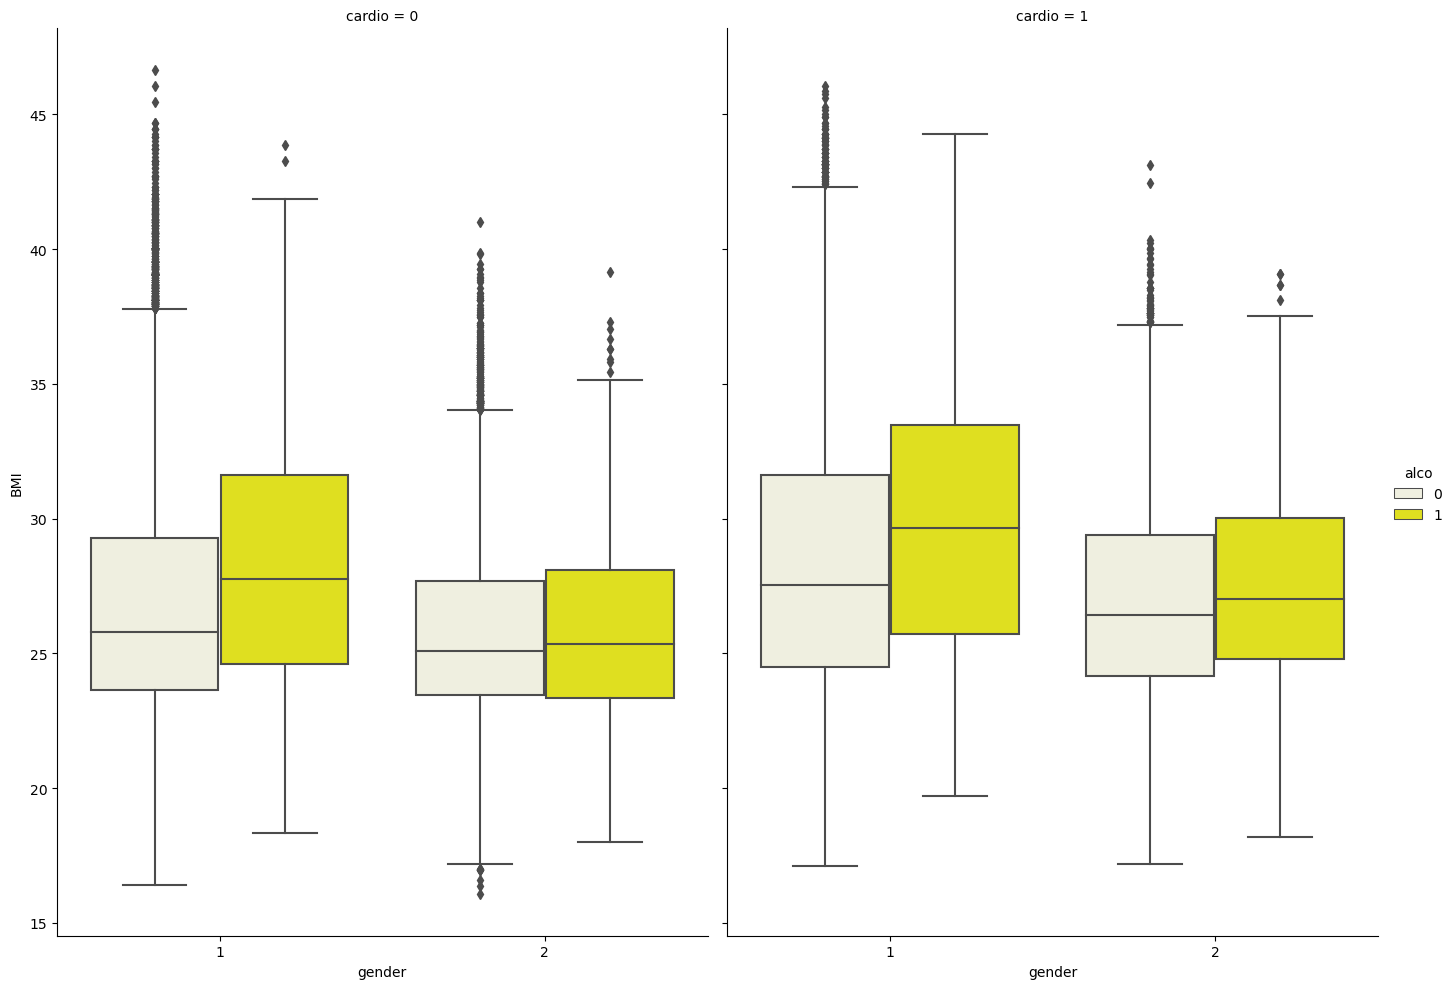

In [61]:
df['BMI'] = df['weight']/((df['height']/100)**2)
sns.catplot(x="gender", y="BMI", hue="alco", col="cardio", data=df, color = "yellow",kind="box", height=10, aspect=.7);

 Drinking women have higher risks for CVD than drinking men based on thier BMI.

In [62]:
df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,years,BMI
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0,50,21.967120
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1,55,34.927679
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1,52,23.507805
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1,48,28.710479
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0,48,23.011177


In [63]:
df['weight'].min()

52.0

In [64]:
# prompt: Using dataframe df: put in the value for years in age and then delete years column

df['age'] = df['years']
df = df.drop('years', axis=1)


In [65]:
df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,BMI
0,0,50,2,168,62.0,110,80,1,1,0,0,1,0,21.967120
1,1,55,1,156,85.0,140,90,3,1,0,0,1,1,34.927679
2,2,52,1,165,64.0,130,70,3,1,0,0,0,1,23.507805
3,3,48,2,169,82.0,150,100,1,1,0,0,1,1,28.710479
4,4,48,1,156,56.0,100,60,1,1,0,0,0,0,23.011177


In [66]:
df.drop('id', axis=1, inplace=True)

In [67]:
df.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,BMI
0,50,2,168,62.0,110,80,1,1,0,0,1,0,21.967120
1,55,1,156,85.0,140,90,3,1,0,0,1,1,34.927679
2,52,1,165,64.0,130,70,3,1,0,0,0,1,23.507805
3,48,2,169,82.0,150,100,1,1,0,0,1,1,28.710479
4,48,1,156,56.0,100,60,1,1,0,0,0,0,23.011177


In [68]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 60142 entries, 0 to 69999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          60142 non-null  int32  
 1   gender       60142 non-null  int64  
 2   height       60142 non-null  int64  
 3   weight       60142 non-null  float64
 4   ap_hi        60142 non-null  int64  
 5   ap_lo        60142 non-null  int64  
 6   cholesterol  60142 non-null  int64  
 7   gluc         60142 non-null  int64  
 8   smoke        60142 non-null  int64  
 9   alco         60142 non-null  int64  
 10  active       60142 non-null  int64  
 11  cardio       60142 non-null  int64  
 12  BMI          60142 non-null  float64
dtypes: float64(2), int32(1), int64(10)
memory usage: 6.2 MB


In [69]:
df1 = df.copy()

# **Blood Pressure Category Analysis**

In [70]:
# prompt: using dataframe:df, use a function to categorize blood pressure

def categorize_blood_pressure(df1):
  """
  Categorize blood pressure based on the following criteria:
  - Normal: Systolic < 120 and Diastolic < 80
  - Elevated: Systolic between 120 and 129 and Diastolic < 80
  - Hypertension Stage 1: Systolic between 130 and 139 or Diastolic between 80 and 89
  - Hypertension Stage 2: Systolic >= 140 or Diastolic >= 90
  """
  df1["BP_Category"] = np.select(
      [
          (df1["ap_hi"] < 120) & (df1["ap_lo"] < 80),
          (df1["ap_hi"] <= 129) & (df1["ap_lo"] < 80),
          (df1["ap_hi"] <= 139) & (df1["ap_lo"] <= 89),
          (df1["ap_hi"] >= 140) | (df1["ap_lo"] >= 90),
      ],
      ["Normal", "Elevated", "Hypertension Stage 1", "Hypertension Stage 2"],
      default="Unknown"
  )
  return df1

df1 = categorize_blood_pressure(df1)


In [71]:
df1.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,BMI,BP_Category
0,50,2,168,62.0,110,80,1,1,0,0,1,0,21.967120,Hypertension Stage 1
1,55,1,156,85.0,140,90,3,1,0,0,1,1,34.927679,Hypertension Stage 2
2,52,1,165,64.0,130,70,3,1,0,0,0,1,23.507805,Hypertension Stage 1
3,48,2,169,82.0,150,100,1,1,0,0,1,1,28.710479,Hypertension Stage 2
4,48,1,156,56.0,100,60,1,1,0,0,0,0,23.011177,Normal


In [72]:
# prompt: Using dataframe df1: rename the column 'ap_hi' to 'systolic bp', 'ap_lo' to 'diastolic bp', 'gluc' to 'glucose', 'alco' to alcohol

df1.rename(columns={
    'ap_hi': 'systolic bp',
    'ap_lo': 'diastolic bp',
    'gluc': 'glucose',
    'alco': 'alcohol'
}, inplace=True)


In [73]:
df1.shape

(60142, 14)

Text(0, 0.5, '# of Patients')

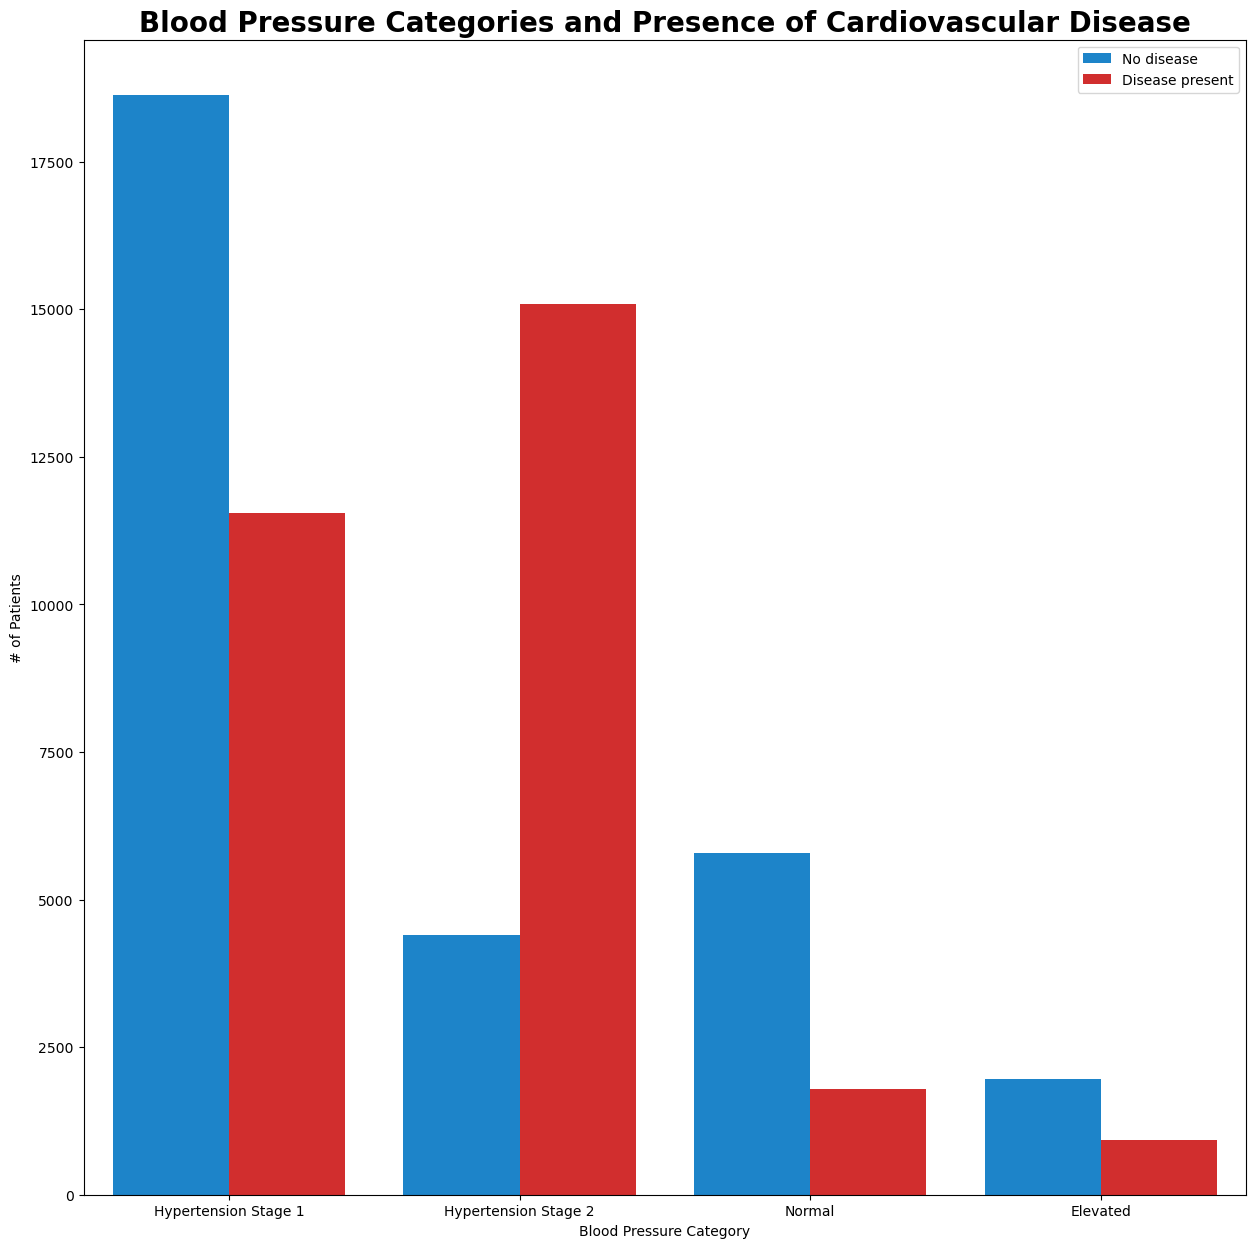

In [74]:
pal = ['#008ae6' , '#ec1313']

plt.figure(figsize= (15,15))
sns.countplot(x= 'BP_Category', hue= 'cardio', data= df1, palette= pal)
plt.title('Blood Pressure Categories and Presence of Cardiovascular Disease',
          fontweight= 'bold', fontsize= 20)
plt.xlabel('Blood Pressure Category')
plt.legend( ['No disease', 'Disease present'])
plt.ylabel('# of Patients')

# **Age Analysis**

In [75]:
print("The maximun age is {}".format(df1['age'].max()))
print("The minimum age is {}".format(df1['age'].min()))

The maximun age is 65
The minimum age is 30


In [76]:
new_df.columns

NameError: name 'new_df' is not defined

In [ ]:
# bin ages into categories
df1.loc[(df1['age'] < 40), 'age_range'] = 30
df1.loc[(df1['age'] >= 40) & (df1['age'] < 50), 'age_range'] = 40
df1.loc[(df1['age'] >= 50) & (df1['age'] < 60), 'age_range'] = 50
df1.loc[(df1['age'] >= 60) & (df1['age'] < 70), 'age_range'] = 60


Text(0, 0.5, 'Patients')

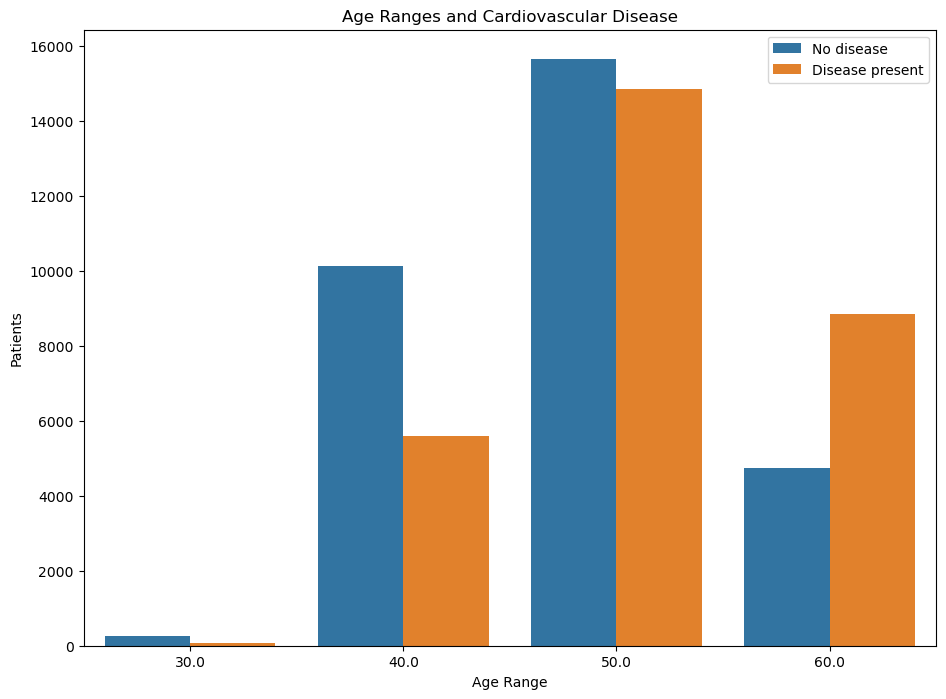

In [ ]:
sns.countplot(x= 'age_range', hue= 'cardio', data= df1)
plt.title('Age Ranges and Cardiovascular Disease')
plt.xlabel('Age Range')
plt.legend( ['No disease', 'Disease present'])
plt.ylabel('Patients')

# **Gender Analysis**

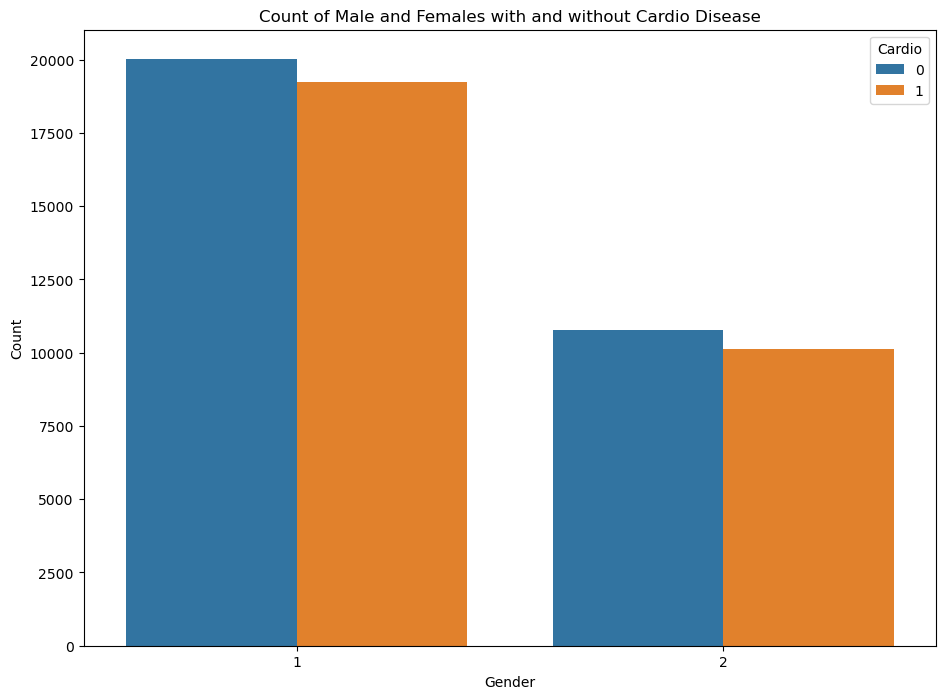

In [ ]:
# prompt: use a count plot to show the count of male and females with and without cardio disease

sns.countplot(x="gender", hue="cardio", data=df1)
plt.title("Count of Male and Females with and without Cardio Disease")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.legend(title="Cardio")
plt.show()


In [ ]:
df1.groupby('gender')['cardio'].mean()

gender
1    0.489988
2    0.484920
Name: cardio, dtype: float64

In [ ]:
df1.columns

Index(['age', 'gender', 'height', 'weight', 'systolic bp', 'diastolic bp',
       'cholesterol', 'glucose', 'smoke', 'alcohol', 'active', 'cardio', 'BMI',
       'BP_Category', 'age_range'],
      dtype='object')

# **Cholesterol Analysis**

---



In [ ]:
df1.cholesterol.value_counts(normalize= True)

1    0.759652
2    0.129743
3    0.110605
Name: cholesterol, dtype: float64

Text(0, 0.5, '# of Patients')

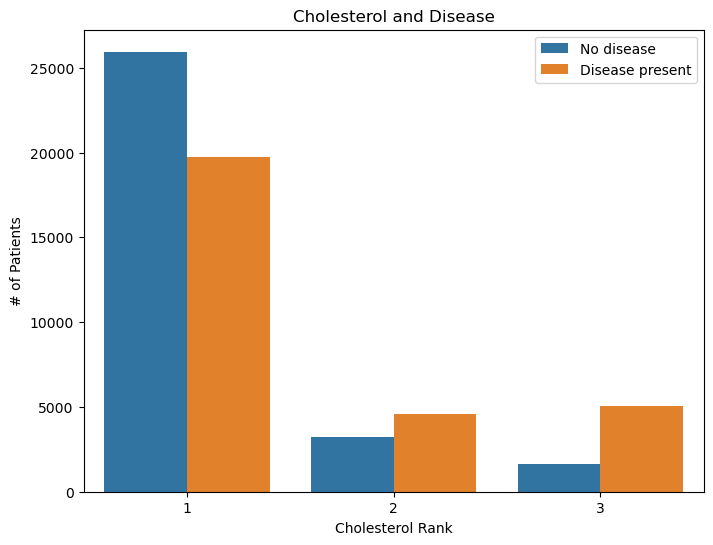

In [ ]:
plt.figure(figsize= (8,6))
sns.countplot(x= 'cholesterol', hue= 'cardio', data= df1)
plt.legend( ['No disease', 'Disease present'])
plt.title('Cholesterol and Disease')
plt.xlabel('Cholesterol Rank')
plt.ylabel('# of Patients')

Text(9.444444444444445, 0.5, 'Has Disease')

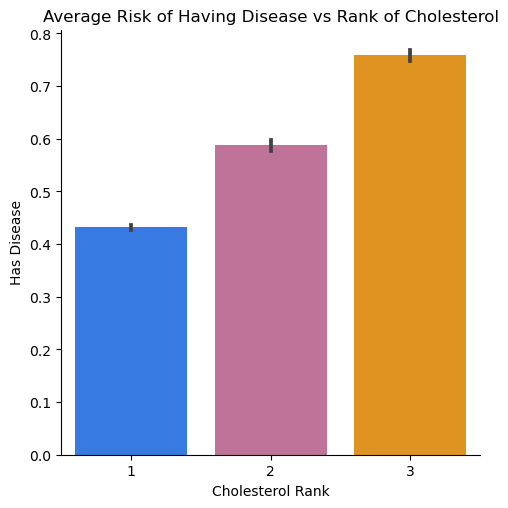

In [ ]:
pal = ['#1a75ff', '#cc6699', '#ff9900']
sns.catplot(x= 'cholesterol', y= 'cardio', data= df1, kind= 'bar',
            palette= pal)
plt.title('Average Risk of Having Disease vs Rank of Cholesterol')
plt.xlabel('Cholesterol Rank')
plt.ylabel('Has Disease')

# **Activity Analysis**

---



In [ ]:
df1.active.value_counts(normalize= True)

1    0.803648
0    0.196352
Name: active, dtype: float64

<Figure size 1200x1000 with 0 Axes>

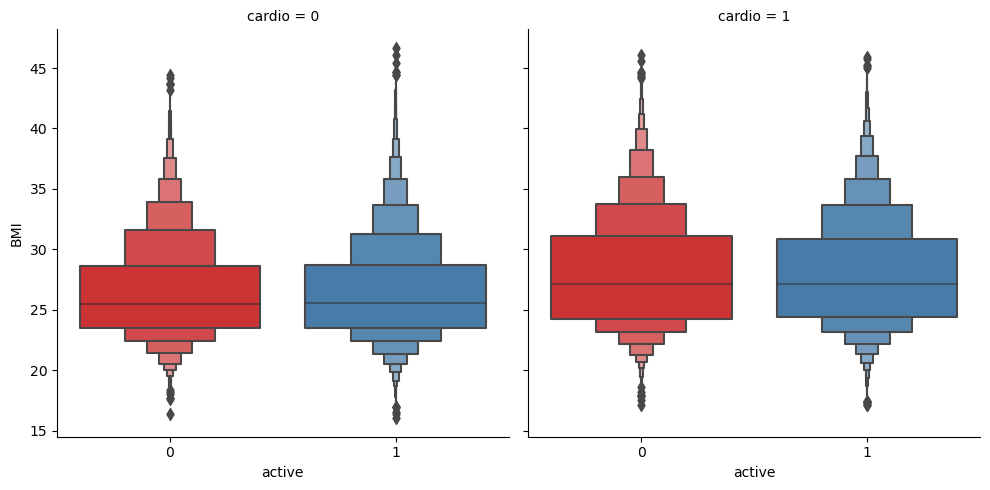

In [ ]:
plt.figure(figsize= (12, 10))
sns.catplot(x='active', y='BMI', col='cardio', data=df1, kind='boxen',
            palette='Set1')

# **Glucose**

---



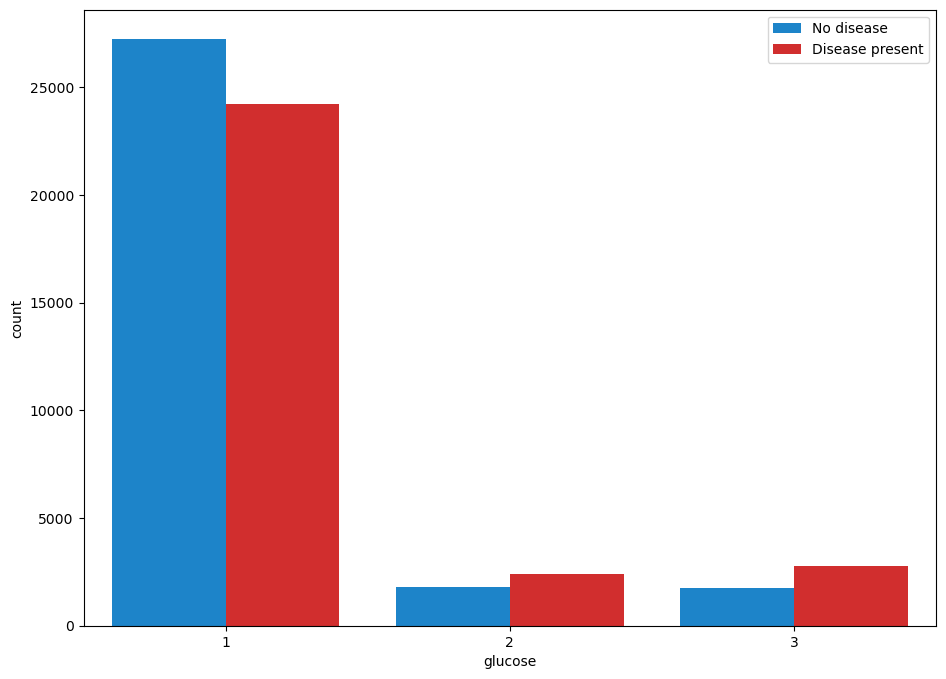

In [ ]:
pal = ['#008ae6' , '#ec1313']
sns.countplot(x= 'glucose', hue= 'cardio', data= df1, palette= pal)
plt.legend( ['No disease', 'Disease present'])

# **Alcohol and Smoke**

---



In [ ]:
df1.groupby(['alcohol', 'smoke'])['cardio'].mean()

alcohol  smoke
0        0        0.491772
         1        0.462968
1        0        0.493333
         1        0.419417
Name: cardio, dtype: float64

In [ ]:
df1.groupby(['alcohol', 'smoke'])['cardio'].count()

alcohol  smoke
0        0        53417
         1         3605
1        0         1575
         1         1545
Name: cardio, dtype: int64

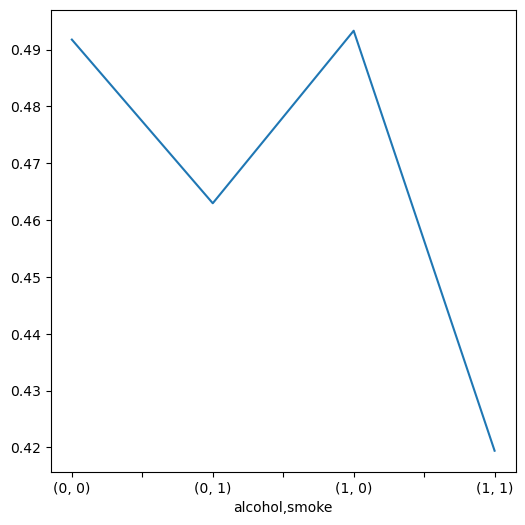

In [ ]:
fig= plt.figure(figsize= (6,6))
al_smo = df1.groupby(['alcohol', 'smoke'])['cardio'].mean().plot()

# **Heatmap**

---



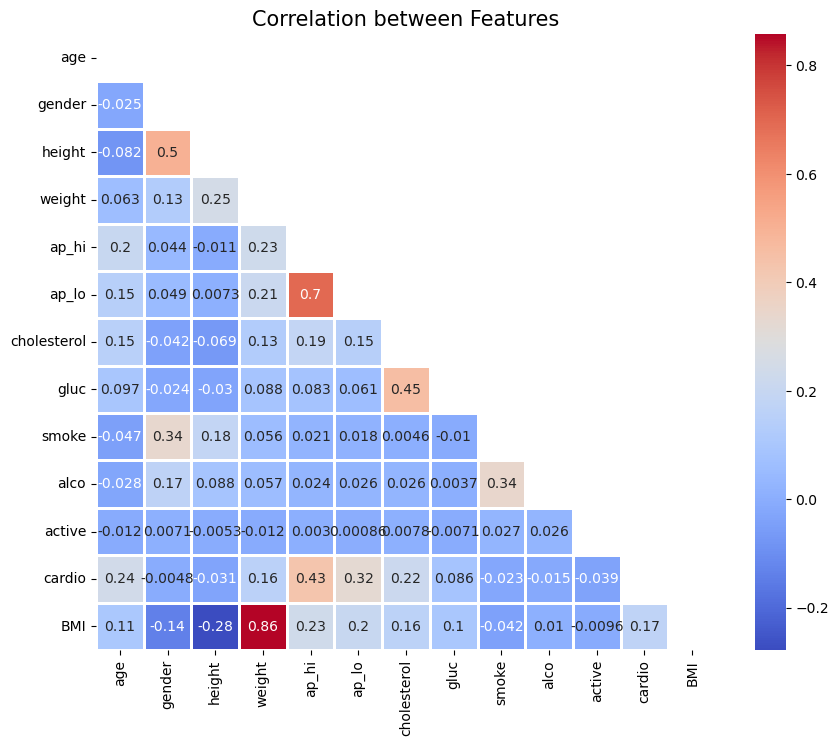

In [ ]:
corr = df.corr()

plt.figure(figsize= (10,8))
mask = np.triu(np.ones_like(corr, dtype=bool))
sns.heatmap(df.corr(), cmap= 'coolwarm', mask= mask, linewidths= 1, annot= True)
plt.title('Correlation between Features', fontsize= 15)
plt.show()

# **Split, train,test**

---



In [ ]:
new_df = df1.copy()

In [ ]:
new_df['gender'] = new_df['gender'].map({2: 1, 1: 0})

In [ ]:
new_df.to_csv('new_cardio.csv')

In [ ]:
new_df.head(10)
new_df.drop(['BP_Category', 'age_range'], axis=1, inplace=True)

In [ ]:
new_df.head()

,age,gender,height,weight,systolic bp,diastolic bp,cholesterol,glucose,smoke,alcohol,active,cardio,BMI
0,50,1,168,62.0,110,80,1,1,0,0,1,0,21.967120
1,55,0,156,85.0,140,90,3,1,0,0,1,1,34.927679
2,52,0,165,64.0,130,70,3,1,0,0,0,1,23.507805
3,48,1,169,82.0,150,100,1,1,0,0,1,1,28.710479
4,48,0,156,56.0,100,60,1,1,0,0,0,0,23.011177


In [ ]:
x = new_df.drop(columns=['cardio'])
y = new_df['cardio']

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state= 42, test_size=0.30)

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [ ]:
x_train.shape

(42099, 12)

In [ ]:
y_train.shape

(42099,)

# **MODELLING**

---



In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, f1_score, roc_curve, roc_auc_score, RocCurveDisplay

In [ ]:
classifiers = {
    'Support Vector Machine' : SVC(),
    'Logistic Regression' : LogisticRegression(),
    'XGBoost' : XGBClassifier(),
    'Random Forest' : RandomForestClassifier(),
    'KNN' : KNeighborsClassifier()
}

In [ ]:
# create DataFrame to hold results from vanilla models
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, f1_score
# takes approx 2 mins to run
results = pd.DataFrame(columns= ['Train_accuracy', 'Test_accuracy', 'F1_score',
                                'False_Negative', 'True_Positive'])

# predict, get accuracy and f1 scores and add to dataframe
conf_matrices = []
for key, value in classifiers.items():
    # fit models
    value.fit(x_train, y_train)
    train_pred = value.predict(x_train)
    y_pred = value.predict(x_test)

    # get accuracy, f1 score
    train_acc = accuracy_score(y_train, train_pred) * 100
    test_acc = accuracy_score(y_test, y_pred) * 100
    f1 = f1_score(y_test, y_pred)

    # get false neg and true positive
    # add to confusion matrices list to view later if desired
    cm = confusion_matrix(y_test, y_pred)
    FN = cm[1][0]
    TP = cm[1][1]
    conf_matrices.append(cm)

    # add measurements to datafram
    results.loc[key] = [round(train_acc, 2), round(test_acc, 2),
                        round(f1, 2), round(FN, 0), round(TP, 0)]

In [ ]:
results.sort_values(by= ['F1_score', 'False_Negative'], ascending= False)

,Train_accuracy,Test_accuracy,F1_score,False_Negative,True_Positive
Support Vector Machine,73.31,72.54,0.70,3103.0,5730.0
XGBoost,76.81,72.11,0.70,2947.0,5886.0
Logistic Regression,72.11,72.03,0.69,3126.0,5707.0
Random Forest,97.50,69.46,0.68,2895.0,5938.0
KNN,77.91,68.61,0.67,3031.0,5802.0


<h1><strong>HYPERPARAMETER TUNING</strong></h1>

---



In [ ]:
# function to get results after each model
from sklearn.metrics import confusion_matrix, classification_report, f1_score, accuracy_score, ConfusionMatrixDisplay

def get_results(model, model_name):
    train_pred = model.predict(x_train)
    y_pred = model.predict(x_test)

    # get classification report
    print('{} Classification Report'.format(model_name))
    print(classification_report(y_test, y_pred))

    # get confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot(cmap="Blues", values_format='.5g')
    plt.grid(False)
    plt.show()

    # get accuracy and F1 scores
    train_acc = accuracy_score(y_train, train_pred) * 100
    test_acc = accuracy_score(y_test, y_pred) * 100
    f1 = f1_score(y_test, y_pred, average='weighted')

    #get false neg and true positive
    cm = confusion_matrix(y_test, y_pred)
    FN = cm[1][0]
    TP = cm[1][1]

    # save measurements into results df
    results.loc[model_name] = [round(train_acc, 2), round(test_acc, 2),
                               round(f1, 2), round(FN, 0), round(TP, 0)]

**SUPPORT VECTOR MACHINE**

Tuned SVM Classification Report
              precision    recall  f1-score   support

           0       0.74      0.67      0.70      9210
           1       0.69      0.76      0.72      8833

    accuracy                           0.71     18043
   macro avg       0.72      0.71      0.71     18043
weighted avg       0.72      0.71      0.71     18043



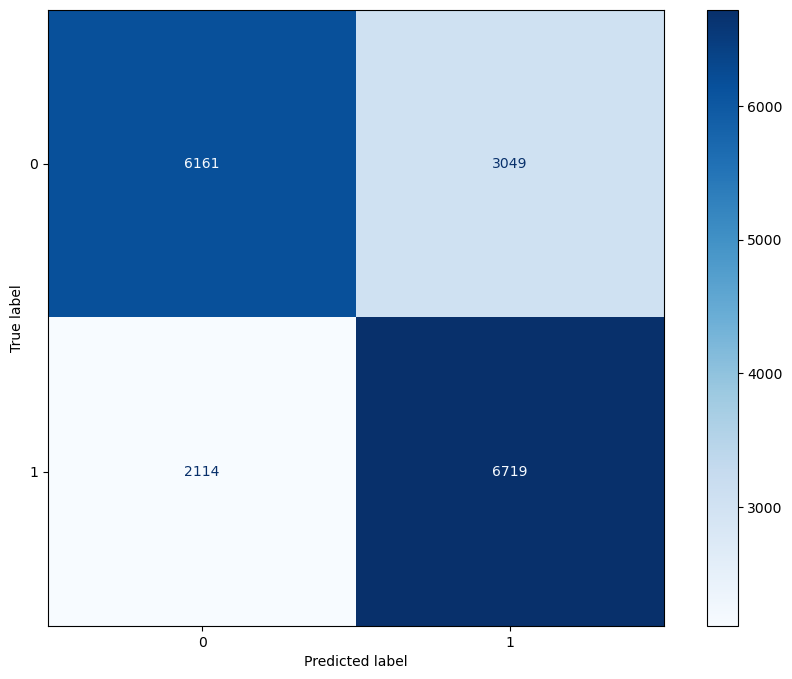

In [ ]:
# Instantiate classifier
svc = SVC(class_weight = {1: 1.5}, random_state= 42)
svc.fit(x_train, y_train)

# see model results and add to results df
get_results(svc, 'Tuned SVM')

**LOGISTIC REGRESSION**

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

lg = LogisticRegression()

# set parameter criteria
param_grid_LG = {
    'penalty': ['l1', 'l2'],
    'C':[0.05, 0.1, 1],
    'class_weight' : [None, {1 : 1.5}],
    'random_state' : [42]
}

# Instantiate Grid Search
tuned_log = GridSearchCV(lg, param_grid_LG, scoring= 'recall')

In [ ]:
tuned_log.fit(x_train, y_train)

GridSearchCV(estimator=LogisticRegression(),
             param_grid={'C': [0.05, 0.1, 1], 'class_weight': [None, {1: 1.5}],
                         'penalty': ['l1', 'l2'], 'random_state': [42]},
             scoring='recall')

In [ ]:
tuned_log.best_params_

{'C': 0.05, 'class_weight': {1: 1.5}, 'penalty': 'l2', 'random_state': 42}

Tuned LR Classification Report
              precision    recall  f1-score   support

           0       0.75      0.64      0.69      9210
           1       0.67      0.77      0.72      8833

    accuracy                           0.71     18043
   macro avg       0.71      0.71      0.70     18043
weighted avg       0.71      0.71      0.70     18043



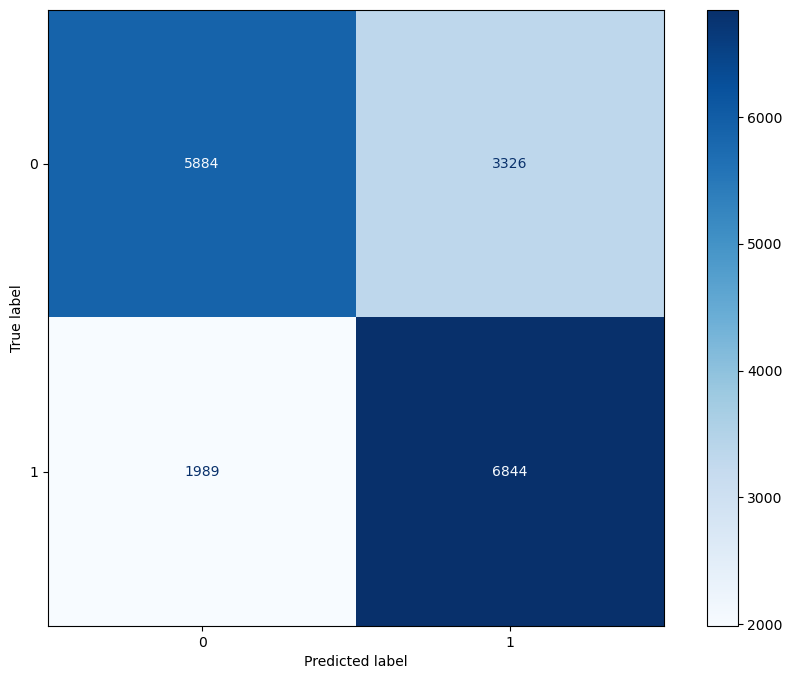

In [ ]:
get_results(tuned_log, 'Tuned LR')

**XGBOOST**

In [ ]:
# Instantiate classifier
xgb2 = XGBClassifier(scale_pos_weight= 3, n_estimators= 125,
                     min_child_weight= 3, max_depth= 4, learning_rate= 0.08,
                     random_state= 42)

In [ ]:
# fit model
xgb2.fit(x_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.08, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=4, max_leaves=None,
              min_child_weight=3, missing=nan, monotone_constraints=None,
              n_estimators=125, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=42, ...)

Tuned XGBoost Classification Report
              precision    recall  f1-score   support

           0       0.83      0.35      0.49      9210
           1       0.58      0.92      0.71      8833

    accuracy                           0.63     18043
   macro avg       0.70      0.64      0.60     18043
weighted avg       0.70      0.63      0.60     18043



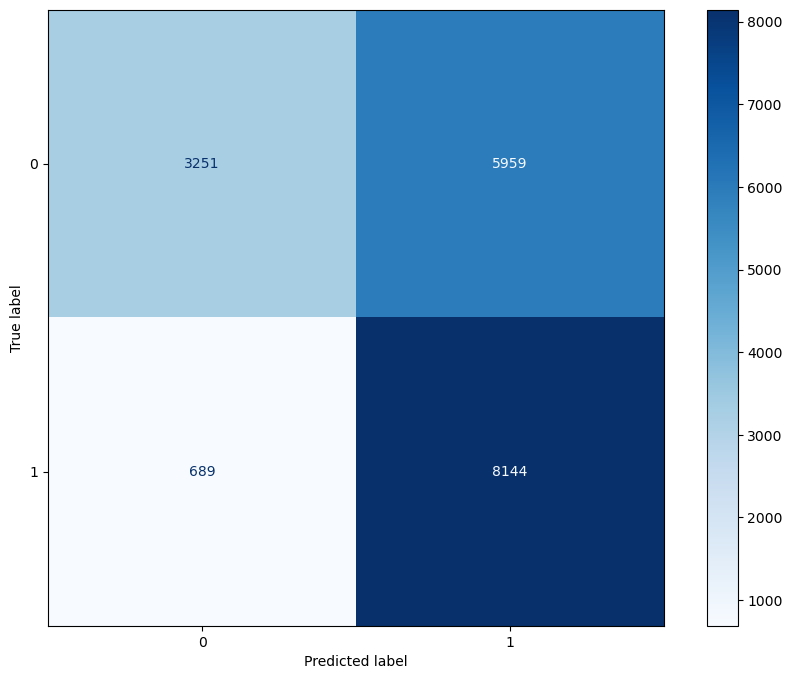

In [ ]:
get_results(xgb2, 'Tuned XGBoost')

**RANDOM FOREST**

Tuned RF Classification Report
              precision    recall  f1-score   support

           0       0.74      0.67      0.70      9210
           1       0.68      0.75      0.72      8833

    accuracy                           0.71     18043
   macro avg       0.71      0.71      0.71     18043
weighted avg       0.71      0.71      0.71     18043



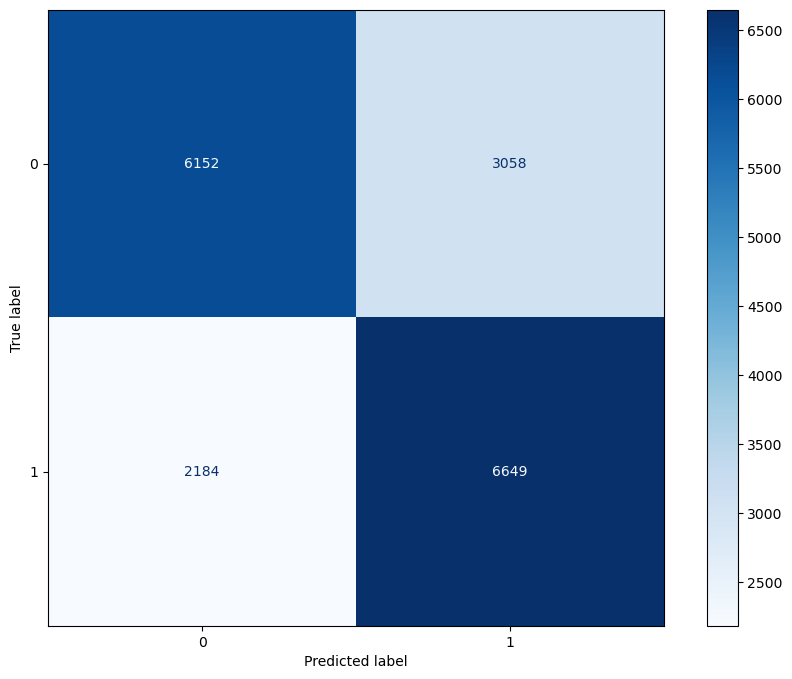

In [ ]:
RF = RandomForestClassifier()

param_grid_RF = {
    'n_estimators' : [200],
    'max_depth' : [100],
    'min_samples_split' : [5, 8],
    'min_samples_leaf' : [3],
    'class_weight' : [{1 : 1.5}, {1 : 1.7}]
}

# Instantiate Randomized Search
RS_RF = RandomizedSearchCV(RF, param_grid_RF, n_iter= 20, scoring= 'recall',
                           random_state= 42)


# fit model
# approx 2 mins to run
RS_RF.fit(x_train, y_train)



# see model results and add to results df
get_results(RS_RF, 'Tuned RF')

**KNN**

Tuned KNN Classification Report
              precision    recall  f1-score   support

           0       0.70      0.75      0.72      9210
           1       0.72      0.67      0.69      8833

    accuracy                           0.71     18043
   macro avg       0.71      0.71      0.71     18043
weighted avg       0.71      0.71      0.71     18043



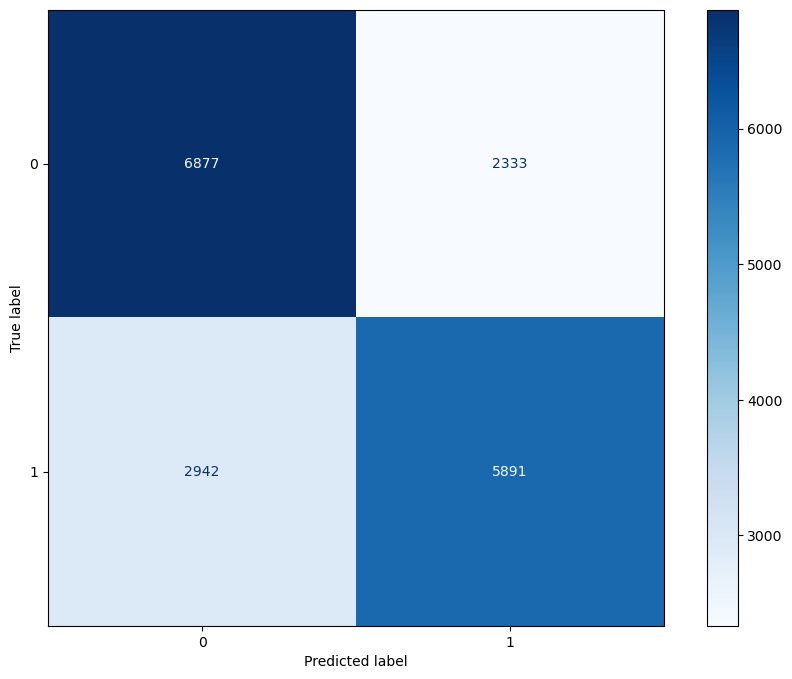

In [ ]:
# Instantiate classifier
KNN = KNeighborsClassifier()

# set parameter guidelines
param_grid_KNN = {
    'n_neighbors' : [23, 25, 27],
    'weights' : ['uniform', 'distance']
}

# Instantiate Grid Search
GS_KNN = GridSearchCV(KNN, param_grid_KNN, n_jobs= 3, scoring= 'recall')


# fit model
# approx 1 min to run
GS_KNN.fit(x_train, y_train)


GS_KNN.best_params_


# see model results and add to results df
get_results(GS_KNN, 'Tuned KNN')

In [ ]:
results = results.sort_values(by= ['F1_score', 'False_Negative'], ascending= False)
results

NameError: name 'results' is not defined

In [ ]:
from sklearn.model_selection import cross_val_score, StratifiedKFold

# Example: Initialize SVM classifier with chosen hyperparameters
model = SVC(kernel='rbf', C=1.0, gamma='scale')

# Define cross-validation strategy (Stratified K-fold)
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Perform cross-validation for accuracy
cv_accuracy = cross_val_score(model, x, y, cv=kfold, scoring='accuracy')

# Perform cross-validation for F1 score
cv_f1 = cross_val_score(model, x, y, cv=kfold, scoring='f1')

# Print cross-validation results
print(f'Cross-Validation Accuracy: {cv_accuracy.mean():.2f} +/- {cv_accuracy.std():.2f}')
print(f'Cross-Validation F1 Score: {cv_f1.mean():.2f} +/- {cv_f1.std():.2f}')


Cross-Validation Accuracy: 0.71 +/- 0.00
Cross-Validation F1 Score: 0.66 +/- 0.01


In [ ]:
# Initialize Logistic Regression model
model = LogisticRegression(max_iter=1000, random_state=42)

# Define cross-validation strategy (Stratified K-fold)
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Perform cross-validation for accuracy
cv_lr_accuracy = cross_val_score(model, x, y, cv=kfold, scoring='accuracy')

# Perform cross-validation for F1 score
cv_f1 = cross_val_score(model, x, y, cv=kfold, scoring='f1')

# Print cross-validation results
print(f'Cross-Validation Accuracy: {cv_accuracy.mean():.2f} +/- {cv_accuracy.std():.2f}')
print(f'Cross-Validation F1 Score: {cv_f1.mean():.2f} +/- {cv_f1.std():.2f}')


Cross-Validation Accuracy: 0.71 +/- 0.00
Cross-Validation F1 Score: 0.69 +/- 0.01


In [ ]:
# import joblib

# cvd_model = joblib.dump(svc, 'model.pkl')

In [1]:
new_df.info()

NameError: name 'new_df' is not defined